# Homework 2

In [6]:
##### IMPORTS
import numpy as np
import math
import random
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
x_file = files.upload()
y_file = files.upload()

Saving x.dat to x.dat


Saving y.dat to y.dat


In [7]:
##### INITIALIZE DATA
X_table = pd.read_table("x.dat", sep="\s+", names=["x_1", "x_2"])
X_train = np.array(X_table)

Y_table = pd.read_table("y.dat", sep="\s+", names=["y"])
Y_train = np.array(Y_table)


In [8]:
##### Functions

import pdb


### REGRESSION FUNCTION
# pretty much just calls the newton's method function
def RegressionAtHome(X_train, Y_train, x_q, tau):
    lamb = 0.5
    theta = newtons_method(X_train, Y_train, x_q, tau, lamb)
    return theta


### NEWTON'S METHOD
#
# start with random theta
# calculate weights for dataset
# calculate gradient, diagonal, hessian for each iteration
# theta + 1 = theta - inverse hessian * gradient
# return the final theta
def newtons_method(X_train, y_train, x_q, tau, lamb):
    theta = np.array([random.uniform(0,10), random.uniform(0,10)])
    weights = [calc_weight(x_q, xi, tau) for xi in X_train]
    # iterate
    for i in range(50):
        diagonal_matrix = diagonal(weights, X_train, theta)
        hessian = hessian_matrix(X_train, diagonal_matrix, lamb)
        inverse_hessian = np.linalg.inv(hessian)
        gradient = gradient_J(X_train, y_train, weights, lamb, theta)
        theta = theta - np.matmul(inverse_hessian, gradient)
    return theta


### COST FUNCTION J
# this is what we're trying to optimize
# we don't currently actually use this
def J(lamb, theta, w_i, y_i, x_i, m):  # can't call it lambda bc python
    sum = 0
    for j in range(m):
        sum += w_i * (y_i * math.log(h(theta, x_i)) + (1 - y_i) * math.log(1 - h(theta, x_i)))
    return ((-1 * lamb * magnitude(theta)**2) / 2) + sum


### SIGMOID FUNCTION h
#
# calculate the sigmoid function for x_i based on theta
# return computed value
def h(theta, x_i):
    x_i = np.array(x_i)
    t = np.matmul(x_i.T, theta)  # this is a dot product
    val = 1 / (1 + math.exp(-1 * t))
    return val


### GRADIENT
# calculate gradient of J (w.r.t theta)
# Gradient is first partial derivatives of the cost function
#
# initialize list of calculated probabilites
# iterate through through weights and training data to compute probabilities
# compute gradient based on training data and probabilites, subtracting theta
# return computed gradient
def gradient_J(X, y_train, weights, lamb, theta):
    probabilities = np.zeros(len(X))
    for i in range(len(X)):
        probabilities[i] = weights[i] * (y_train[i] - h(theta, X[i]))
    gradient = np.matmul(X.T, probabilities) - lamb * theta
    return gradient


### HESSIAN MATRIX
# second partial derivatives of the cost function
#
# use equation from assignment to compute Hessian based on diagonal matrix
def hessian_matrix(X, D, lamb):
    multiplied_matrix = np.matmul(np.matmul(X.T, D), X)
    hessian = multiplied_matrix - lamb * np.eye(multiplied_matrix.shape[0])
    return hessian


### DIAGONAL MATRIX
#
# initialize empty diagonal array
# loop through diagonal, compute each entry based on given equation
# return diagonal matrix
def diagonal(weights, X, theta):
    diagonal_matrix = np.eye(len(X))
    for i in range(diagonal_matrix.shape[0]):
        sigmoid_val = h(theta, X[i])
        diagonal_matrix[i][i] = -1 * weights[i] * sigmoid_val * (1 - sigmoid_val)
    return diagonal_matrix


### MAGNITUDE
# shorthand to calculate magnitude of a vector
def magnitude(vector):
    mag = np.linalg.norm(vector)
    return mag


### WEIGHT FUNCTION
# calculate the weight for a datapoint based on point x_q
def calc_weight(x_q, x_i, tau):
    x_q = np.array(x_q)
    x_i = np.array(x_i)
    difference = x_q - x_i
    w_i = math.exp(-1 * (magnitude(difference)**2) / (2 * tau**2))
    return w_i


### MAIN FUNCTION
def main():
    x_q = [1,1]
    tau = 0.5
    lamb = 0.5
    # predicted = RegressionAtHome(X_train, Y_train, x_q, tau)
    # PlotTest(xrange,yrange,predicted)
    # print(predicted)


##### RUN FUNCTIONS HERE
main()


In [9]:
### HEATMAP
def heatmap_gen(x_train, y_train, tau, res):
    # Setup plotting grid
    xx, yy = np.meshgrid(np.linspace(-1, 1, res), np.linspace(-1, 1, res))
    # Make predictions
    x = np.zeros(2)
    pred = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            x[0] = xx[i, j]
            x[1] = yy[i, j]
            # Perform regression with x_q= ([x[0],x[1]])
            x_q = [x[0],x[1]]
            theta = RegressionAtHome(X_train, Y_train, x_q, tau)
            # set values to 0 or 1
            if h(theta, x_q) > 0.5:
                pred[i][j] = 1
            else:
                pred[i][j] = 0
            # Print for testing
            # print(i, j, pred[i][j])
    return pred

resolution = 25
tau = 0.5
pred = heatmap_gen(X_train, Y_train, tau, resolution)

## RUNTIMES (from sammy 10/4) -- this was run with the print statements so it might be a litttttle faster than this without
# res = 2  , 1sec
# res = 5  , 4sec
# res = 10 , 9sec
# res = 20 , 29sec
# res = 25 , 46sec
# res = 50 , 3min16sec
# res = 75 , 6min57sec
# res = 100, 12min30sec (PREDICTION: 12min49sec)


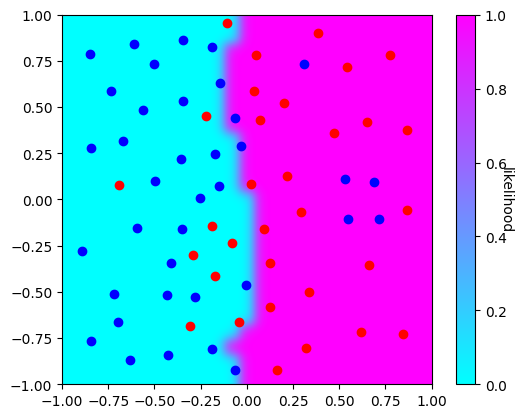

In [14]:
def heatmap_plot(x_train, y_train, pred):
  # Scatter plot data points
    for i in range(0,y_train.size):
        if y_train[i]==0:
            plt.scatter(x_train[i,0],x_train[i,1],c='b')
        if y_train[i]==1:
            plt.scatter(x_train[i,0],x_train[i,1],c='r')
    # Plot heat map
    plt.imshow(pred, cmap='cool',interpolation='gaussian',extent=[-1,1,-1,1])  # interpolation is just different kinds of blurry on the map
    cbar = plt.colorbar(cmap='cool')
    cbar.set_label('likelihood', rotation = 270)
    plt.show()

heatmap_plot(X_train, Y_train, pred)

### Old functions, don't need them anymore VVV
putting this text block here to make it collapseable in co-lab

In [ ]:
##### OLD FUNCTIONS -- NOT IN USE ANYMORE, JUST AN ARCHIVE
def RegressionAtHome_OLD(X_train, Y_train, x_q, tau):
    lamb = 0.5
    predicted = []
    for i in range(len(X_train)):
        theta = newtons_method(X_train, X_train[i], Y_train[i], x_q, tau, lamb)
        if h(theta, X_train[i]) > 0.5:
            predicted.append(1)
        else:
            predicted.append(0)

    return predicted

def newtons_method_OLD(X_train, x_i, y_i, x_q, tau, lamb):
    theta = np.array([random.uniform(0,10), random.uniform(0,10)])
    # print("initial theta:", theta)
    weights = [calc_weight(x_q, xi, tau) for xi in X_train]
    w_i = calc_weight(x_q, x_i, tau)
    # iterate
    for i in range(50):
        # weight_theta = calc_weight(x_q, theta, tau)
        diagonal_matrix = diagonal(weights, X_train, theta)
        hessian = hessian_matrix(X_train, diagonal_matrix, lamb)
        inverse_hessian = np.linalg.inv(hessian)
        gradient = gradient_J(X_train, w_i, y_i, x_i, lamb, theta)
        # print(inverse_hessian.shape)
        # print(gradient.shape)
        # pdb.set_trace()
        theta = theta - np.matmul(inverse_hessian, gradient)
        # print(theta)
    return theta

def gradient_J_OLD(X, w_i, y_i, x_i, lamb, theta):
    # print("calling h from gradient")
    gradient = x_i.T * (w_i * (y_i - h(theta, x_i))) - lamb * theta
    return gradient

## Problem 2

1. Soft-Margin Linear SVM, C=.02 corresponds to graph #4. This is a linear model with larger margins, so the C value is lower.
2. Soft-Margin Linear SVM, C=20 corresponds to graph #3. This is a linear model with smaller margins, so the C value is higher.
3. A hard-margin kernel SVM with $k(u,v) = uv - (uv)^2$ corresponds to graph #5. This is a polynomial kernel, which matches the shape of this decision boundary.
4. A hard-margin kernel SVM with $k(u,v) = exp(-5\|u-v\|^2)$ corresponds to graph #6. The high gamma value (5) implies that the decision boundary will be overfitted.
5. A hard margin kernel SVM with $k(u,v) = exp(-\frac{1}{5}\|u-v\|^2)$ corresponds to graph #1. The relatively low gamma value of $\frac{1}{5}$ implies that the decision boundary will not be overfitted.
